In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linalg as LA
from sklearn.utils import shuffle

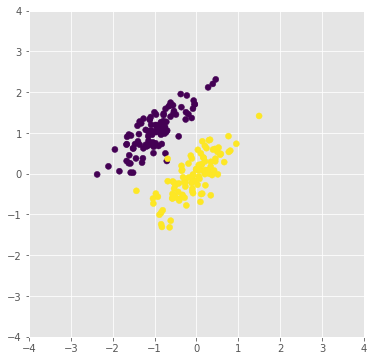

In [8]:
plt.style.use("ggplot")
N = 100

mu1 = [-1, 1]
mu2 = [0, 0]
mu3 = [1, -1]
sigma1 = sigma2 = sigma3 = np.array([[0.2, 0.15],[0.15, 0.2]])
 
data1 = np.random.multivariate_normal(mu1, sigma1, N)
data2 = np.random.multivariate_normal(mu2, sigma2, N)
 
train_X = np.concatenate((data1, data2))
train_t = np.concatenate((np.repeat(0, N), np.repeat(1, N)))
 
plt.figure(figsize=(6, 6))
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_t)
plt.show()

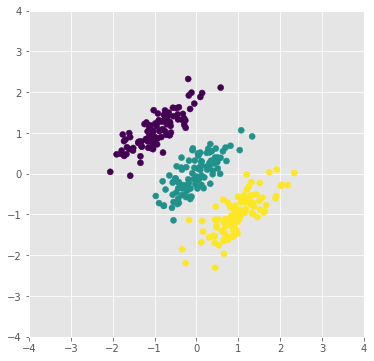

In [9]:
N = 100
 
mu1 = [-1, 1]
mu2 = [0, 0]
mu3 = [1, -1]
sigma1 = sigma2 = sigma3 = np.array([[0.2, 0.15],[0.15, 0.2]])
 
data1 = np.random.multivariate_normal(mu1, sigma1, N)
data2 = np.random.multivariate_normal(mu2, sigma2, N)
data3 = np.random.multivariate_normal(mu3, sigma3, N)
 
train_X = np.concatenate((data1, data2, data3))
train_t = np.concatenate((np.repeat(0, N), np.repeat(1, N), np.repeat(2, N)))
 
plt.figure(figsize=(6, 6))
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_t)
plt.show()

In [11]:
def phi(x, y):
    return np.array([x, y, 1])
 
def sigmoid(x):
    return 1 / (np.exp(-x) + 1)

def one_hot_encode(arr, num_classes):
    return np.eye(num_classes)[arr]

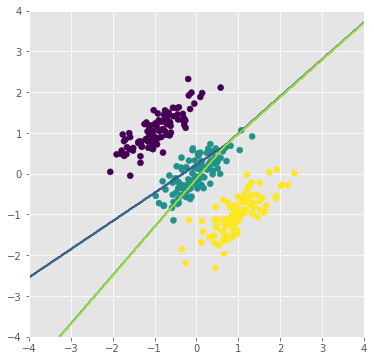

In [39]:
%matplotlib inline
train_X, train_t = shuffle(train_X, train_t)
train_t_onehot = one_hot_encode(train_t,3)
Phi = np.array([phi(x,y) for x,y in train_X])

w_ls = np.linalg.pinv(sigmoid(Phi))@train_t_onehot
#w_ls = LA.inv(Phi.T.dot(Phi)).dot(Phi.T).dot(train_t_onehot)

X, Y = np.meshgrid(np.linspace(-4,4,400), np.linspace(-4,4,400))
Z = np.vectorize(lambda x, y : phi(x,y).dot(w_ls).argmax())(X, Y)

plt.figure(figsize=(6, 6))
plt.xlim(-4, 4)
plt.ylim(-4, 4)
 
x_ = np.linspace(-4, 4)
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_t)
plt.contour(X, Y, Z)
plt.show()